In [17]:
import chardet
import numpy as np 
import pandas as pd

fenda = 0.1
tab = '\t'


voltagem = [4.0, 7.0, 9.0, 9.5, 10.0]
corrente = [0.45, 0.56, 0.68, 0.69, 0.70]
resistencia = 0.2

resistividade = []
temperatura = []

intensidadeLuz = []
posicaoAngular = []

refractionIndexPerVolt = []
wavelengthPerVolt = []

wavelength = []
refractionIndex = []

A = 320
B = 1
C = 0.2
D = 0.19
E = 1.635

for i in range(np.size(voltagem)):
    resistividade.append(5.65*((voltagem[i]/corrente[i]) - resistencia)/0.93)
    temperatura.append(103 + 38.1*resistividade[i] - 0.095*(resistividade[i]*resistividade[i]) + 0.000248*(resistividade[i]*resistividade[i]*resistividade[i]))
    
# print('Resistividade por volt: ',resistividade)
# print('Temperatura por volt: ',temperatura)

dados = {
        "volts": voltagem,
        "resistividade": resistividade,
        "temperatura": temperatura,
        }

dataFrame = pd.DataFrame(dados)
dataFrame.to_csv(f'results/TemperaturaResistividade.txt', index=False, sep=tab)

for volt in voltagem:
    with open(f'data/0.1mm{volt}v.txt', 'rb') as f:
            enc = chardet.detect(f.read())  # or readline if the file is large

    file = pd.read_csv(f'data/0.1mm{volt}v.txt', header = None, sep='\s+', encoding=enc['encoding'])
    posicaoAngular.append([file[1].abs()])
    intensidadeLuz.append([file[2]])


for array in posicaoAngular:
    for i in array:
        n = np.sqrt(((2/np.sqrt(3))*np.sin(i) + (1/2))*((2/np.sqrt(3))*np.sin(i) + (1/2)) + (3/4))
        w = A + B*(1/(n-E)) + C*(1/(n-E))*(1/(n-E)) + D*(1/(n-E))*(1/(n-E))*(1/(n-E))
        
        refractionIndexPerVolt.append(n)
        wavelengthPerVolt.append(w)
        
    refractionIndex.append(refractionIndexPerVolt)
    wavelength.append(wavelengthPerVolt)
    refractionIndexPerVolt = []
    wavelengthPerVolt = []
 

for i in range(np.size(voltagem)):
    dadosVolt = {
              "wavelength": wavelength[i][0],
              "refractionIndex": refractionIndex[i][0],
              "intensidade": intensidadeLuz[i][0],
              "posicao": posicaoAngular[i][0]
              }

    volt = voltagem[i]
    
    dataFrame = pd.DataFrame(dadosVolt)
    dataFrame.to_csv(f'results/dadosV{volt}.txt', index=False, sep=tab)



Resistividade por volt:  [52.787335722819606, 74.72580645161291, 79.19291587602784, 82.42995169082127, 85.57450076804916]
Temperatura por volt:  [1885.9585545795185, 2523.060031620187, 2647.6275202850907, 2736.986412485532, 2823.1160278877105]


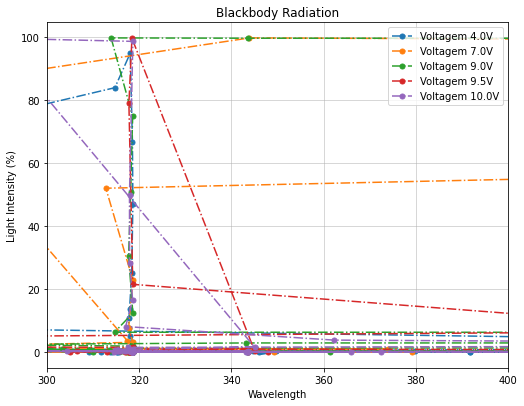

In [90]:
import matplotlib.pyplot as plt 
import numpy as np 

fig1 = plt.figure(figsize=(8,6))

# x=np.arange(0,50,2)

axes = fig1.add_axes([0.1,0.1,0.8,0.8])

for volt in voltagem:
    file = pd.read_csv(f'results/dadosV{volt}.txt', header = 0, sep='\s+')
    axes.plot(file['wavelength'], file['intensidade'], ls='-.', marker='o',markersize=5, label=f'Voltagem {volt}V')
    axes.set_xlabel('Wavelength')
    axes.set_ylabel("Light Intensity (%)")
    
axes.set_title("Blackbody Radiation")

axes.set_xlim(300, 400)

plt.grid(linestyle='-', linewidth=0.5)
axes.legend(loc='upper right')

plt.savefig("plots/blackbody.png", dpi=400)

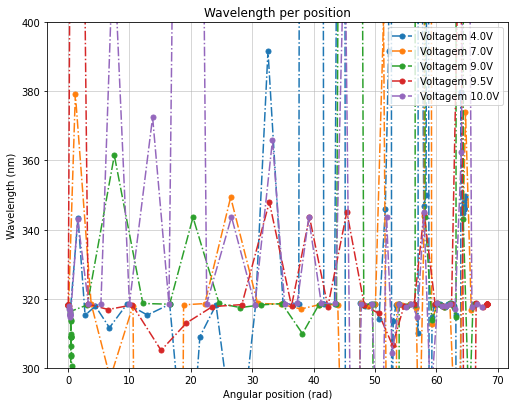

In [91]:
import matplotlib.pyplot as plt 
import numpy as np 

fig1 = plt.figure(figsize=(8,6))

# x=np.arange(0,50,2)

axes = fig1.add_axes([0.1,0.1,0.8,0.8])

for volt in voltagem:
    file = pd.read_csv(f'results/dadosV{volt}.txt', header = 0, sep='\s+')
    axes.plot(file['posicao'], file['wavelength'], ls='-.', marker='o',markersize=5, label=f'Voltagem {volt}V')
    axes.set_xlabel('Angular position (rad)')
    axes.set_ylabel("Wavelength (nm)")
    
axes.set_title("Wavelength per position")

axes.set_ylim(300, 400)

plt.grid(linestyle='-', linewidth=0.5)
axes.legend(loc='upper right')

plt.savefig("plots/wavelengthperposition.png", dpi=400)

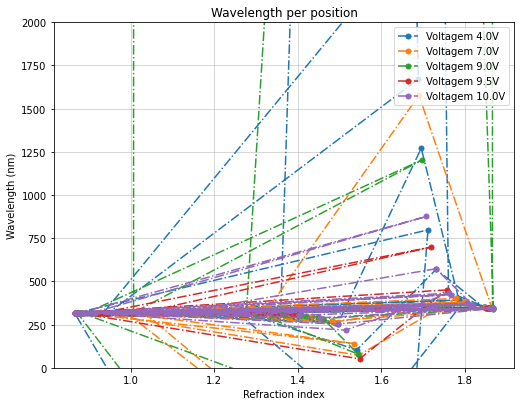

In [92]:
import matplotlib.pyplot as plt 
import numpy as np 

fig1 = plt.figure(figsize=(8,6))

# x=np.arange(0,50,2)

axes = fig1.add_axes([0.1,0.1,0.8,0.8])

for volt in voltagem:
    file = pd.read_csv(f'results/dadosV{volt}.txt', header = 0, sep='\s+')
    axes.plot(file['refractionIndex'], file['wavelength'], ls='-.', marker='o',markersize=5, label=f'Voltagem {volt}V')
    axes.set_xlabel('Refraction index')
    axes.set_ylabel("Wavelength (nm)")
    
axes.set_title("Wavelength per refraction index")

axes.set_ylim(0, 2000)

plt.grid(linestyle='-', linewidth=0.5)
axes.legend(loc='upper right')

plt.savefig("plots/wavelengthperrefraction.png", dpi=400)

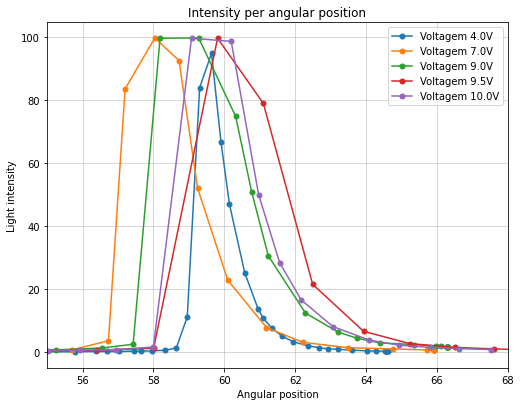

In [99]:
import matplotlib.pyplot as plt 
import numpy as np 

fig1 = plt.figure(figsize=(8,6))

# x=np.arange(0,50,2)

axes = fig1.add_axes([0.1,0.1,0.8,0.8])

for volt in voltagem:
    file = pd.read_csv(f'results/dadosV{volt}.txt', header = 0, sep='\s+')
    axes.plot(file['posicao'], file['intensidade'], ls='-', marker='o',markersize=5, label=f'Voltagem {volt}V')
    axes.set_xlabel('Angular position')
    axes.set_ylabel("Light intensity")
    
axes.set_title("Intensity per angular position")

# axes.set_ylim(0, 2000)
axes.set_xlim(55, 68)

plt.grid(linestyle='-', linewidth=0.5)
axes.legend(loc='upper right')

plt.savefig("plots/intensityperposition.png", dpi=400)